# Red Neuronal XO (XOR en ingles).
## Desarrollo matricial, propagación hacia adelante
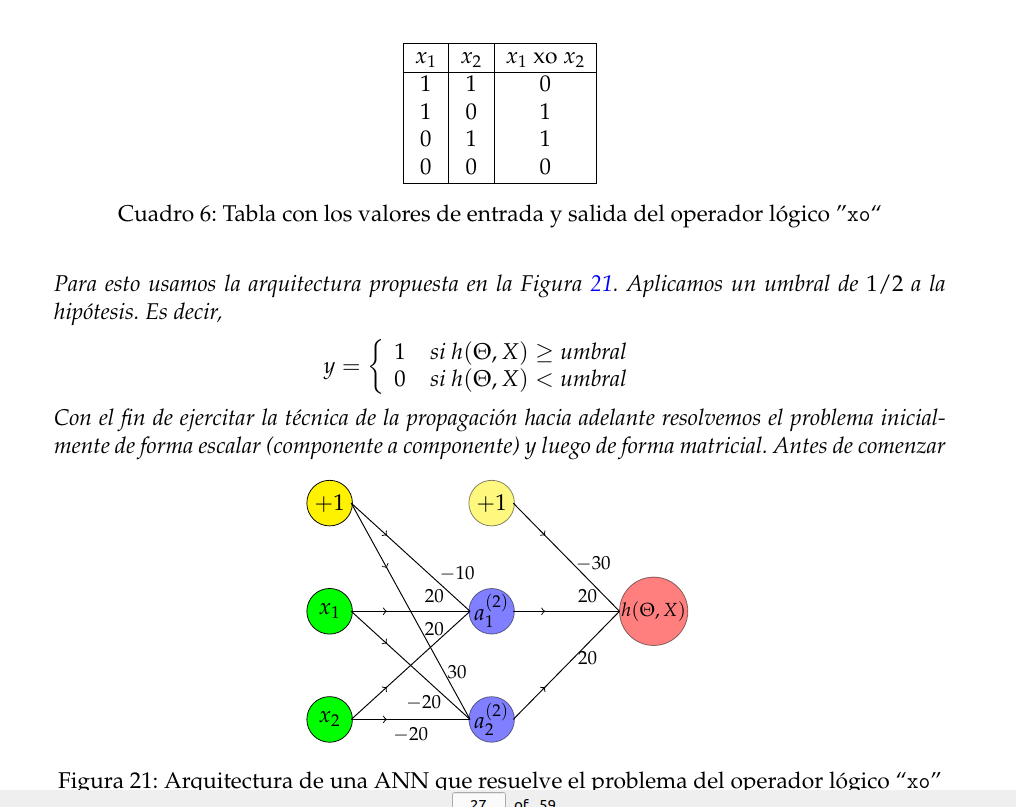

In [14]:
import numpy as np

def s(x):
    return 1/(1 + np.exp(-x))

X = np.array( [[0,0], [0,1], [1,0], [1,1]])
n = len(X)


# debemos agregar una columna de unos "1" (por el sesgo)
ones = np.ones( shape=(n,1), dtype='float')
X = np.column_stack( (ones, X))
Theta1 = np.array([ [-10,30], [20,-20], [20,-20]])
Theta2 = np.array( [ [-30], [20], [20] ])
# Z1 = X*Theta1
Z1 = X.dot(Theta1)
# activacion
A = s(Z1)
A = np.column_stack( (ones, A))
# Z2 = A*Theta2
Z2 = A.dot(Theta2)

# Hipotesis H, s(Z2)
H = s(Z2)
B = ( H > 0.5)
list(map(int, B))


[0, 1, 1, 0]

 ## Backpropagation (propagacion hacia atras).
 La idea es obtener el valor de los $\theta$s. Este es un problema de optimizacion. Debemos definir una funcion de costo . Llamemos la funcion de costo $J$. Como se actualizaon los pesos. 

 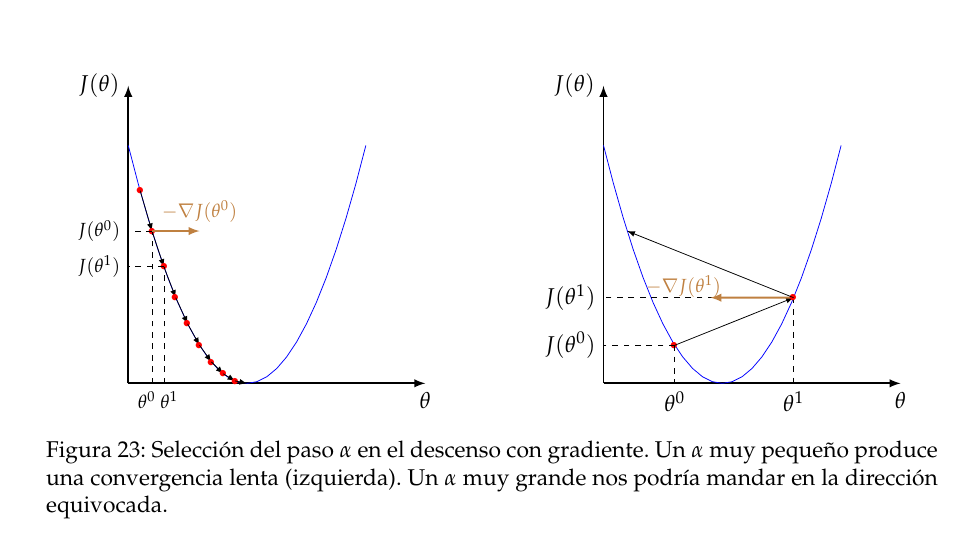

La funcion de costo para la progacion hacia atras es:

$$ J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^{K} y_i^{(k)} \log [ h_k(\Theta_k,  x^{(i)}]  + (1 - y_i^{(k)}) \log [ 1 - h_k(\Theta, x^{(i)})] + 
\frac{\lambda}{2m} \sum_{i=1}^{L} \sum_{i=1}^{n_l} \sum_{j=1}^{n_{l+1}} (\Theta_{ij}^{(l)})^2$$

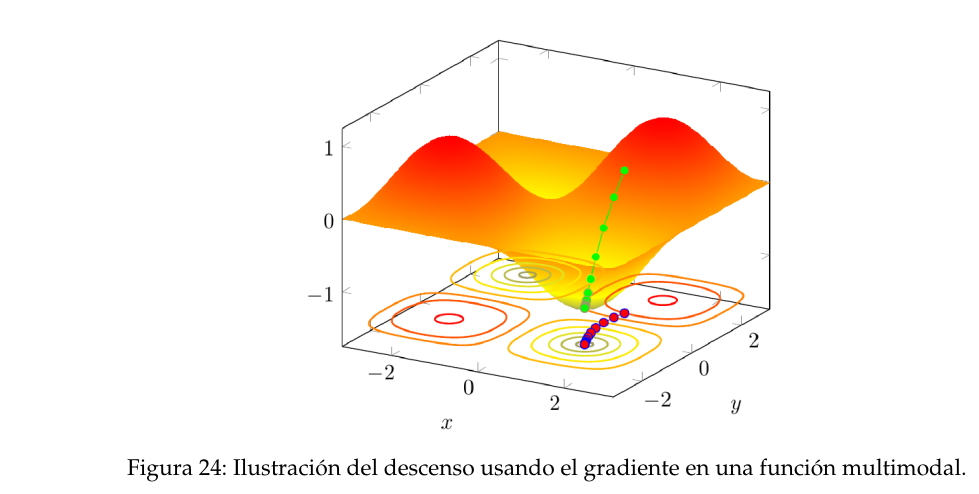

Antes de propagar hacia atras, tenemos que avanzar desde los datos hasta la ultima capa.

\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(1)}) = S( X \Theta^{(1)}) \\
&\vdots& \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L-2)}) \\
A^{(L)} &=& S(Z^{(L)}) = S(A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta, X) &=& A^{(L+1)} = S(Z^{(L+1)} ) S(A^{(L)} \Theta^{(L)})
\end{eqnarray}

Gradiente en la ultima capa $L$.

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}} = \frac1m (A^{(L)})_p^T  (A^{(L+1)} - Y)_q
\end{eqnarray}

En la penultima capa $L-1$.
\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L-1)}} = \frac1m [ (A^{(L-1)})^T]_p [ ( A^{(L+1)} - Y) (\Theta^{(L)})^T A^{(L)}. *(1 - A^{(L)}]_q
\end{eqnarray}

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(I)}} = \frac1m [ (A^{(I)})^T]_p [ ( A^{(I+2)} - Y) (\Theta^{(L)})^T A^{(I+1)}. *(1 - A^{(I+1)}]_q
\end{eqnarray}



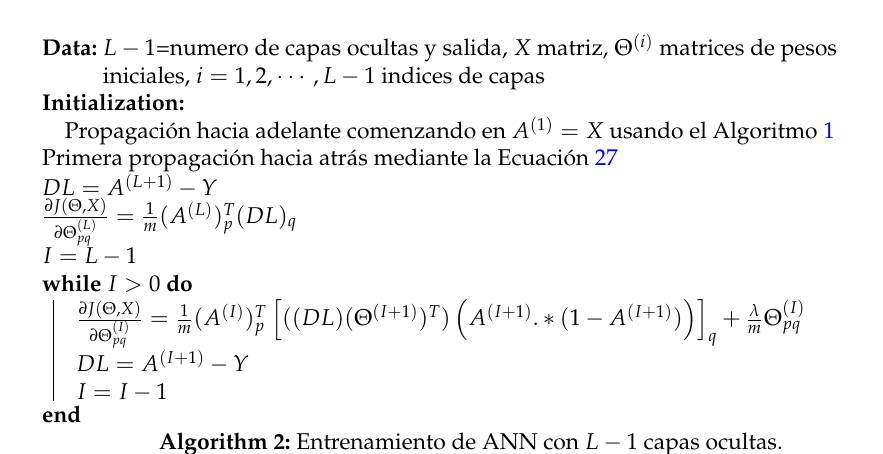